In [2]:
# Import the dependencies
import numpy as np
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
# import scipy.linalg as la
from scipy import signal
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
print("Imports done")


Imports done


[5.         5.11030063 5.21787638 ... 1.90762781 1.90597358 1.90451758]
[0.09 0.09 0.09 ... 0.09 0.09 0.09]


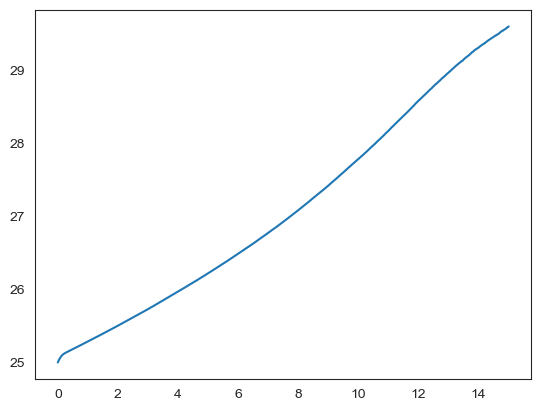

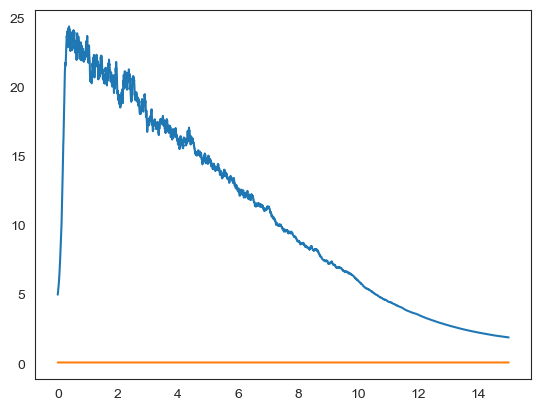

In [7]:

from statistics import mean, variance, pstdev
# Setting up the time data:
dt = 0.005; # integration step, average neuron resets 200 times per second
T = 15+dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points
v = 30
std_noise = 0.3
var = np.full((N), std_noise**2)


x = np.zeros(N)
mu = np.zeros(N)
e = np.zeros(N)
omega = np.zeros(N)
sigma = np.zeros(N)
EWMA = np.zeros(N)
omega[0] = 0.2
mu[0]= 25
std = np.zeros(N)




for i in np.arange(0,N-1):
    x[i] = v + np.random.randn(1)*std_noise
    sigma[i] = 1/omega[i]
    
    e[i] = x[i] - mu[i]
    
    domega = 0.5*(1/omega[i] - e[i]**2)
    omega[i+1] = omega[i] + dt*domega
    omega[i+1] = 0.1*omega[i+1] + (1-0.1)*omega[i]

    dmu = omega[i]*e[i]
    
    mu[i+1] = mu[i] + dt*dmu
    sigma[i+1] =1/ omega[i+1]
    



plt.plot(t,mu)

plt.figure()
plt.plot(t,sigma)
plt.plot(t,var)




print(sigma)
variance(x)

print(var)


In [3]:
print(sigma)
print(EWMA)

[5.         6.43011656 8.88216059 ... 0.66790832 0.66719014 0.66645094]
[4.5        6.23710491 8.61765502 ... 0.66798595 0.66726972 0.        ]
